There are multiple parts to this problem. But first, explore the data.
 

In [ ]:
# load the Auto dataset from the ISLR package
# install ISLR, if not installed previously
install.packages("ISLR")
library(ISLR)

In [ ]:
# first, remove observations with null values
Auto <- na.omit(Auto)

In [ ]:
# list variables (both predictor and response/target)
names(Auto)

In [ ]:
# view the structure of the dataframe including values and types
str(Auto)

In [ ]:
# list dimensions of the dataset
dim(Auto)

(a) Use the *lm()* function to perform a simple linear regression with **mpg as the response** and **horsepower as the predictor**.

In [ ]:
# construct a simple linear model to predict mpg using one predictor variable (horsepower)

# the following does not work for predicting response for a given predictor
# insted, predicts for each training data instance
auto.LM <- lm(Auto$mpg ~ Auto$horsepower)

# instead, do the following approach to build the model

# simplify notation for referencing variables in the dataset
attach(Auto)

auto.LM <- lm(mpg ~ horsepower)


In [ ]:
# print model coefficients
coef(auto.LM)

In [ ]:
# predct **mpg* using auto.LM
fitted(auto.LM)

In [ ]:
# print residual errors in mpg
resid(auto.LM)

In [ ]:
# examine the linear model
summary(auto.LM)

Use the *summary()* function to print the model. Comment on the output. More specifically:
    
- Is there a relationship between the predictor and the response? 

- How strong is the relationship between the predictor and the response?

- Is the relationship between the predictor and the response positive or negative?

- What is the predicted *mpg* associated with a *horsepower* of 98? What are the associated 95% confidence and prediction intervals?

(i) The **F-statistic is much larger than 1** and the corresponding p-value is extremely small. Yes, there is a relationship between **horsepower** and **mpg**.


(ii) Compute the residual error relative to the response using the mean of the response and the RSE

- **mpg** mean is 23.4 (without regression function, this is the response value)

- RSE of auto.LM = 4.906

- Therefore, percent error = 4.906 / 23.4 = 20.96%

- $R^2$ of auto.LM = 0.6059, which indicates that 60.59% of the variance in mpg is explained by horsepower. Therefore, **horsepower** is a strong predictor of **mpg**.

(iii) The relationship between **mpg** and **horsepower** is **negative** (notice that the slope is negative, that is -0.157845)

(iv) What is the predicted *mpg* associated with a *horsepower* of 98? 

In [29]:
# create a data frame for holding 98
predData = data.frame(horsepower=c(98))

# predicts, and also include confidence interval
predict(auto.LM, predData, interval="confidence")


,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [ ]:
What are the associated prediction intervals?

In [28]:
# predicts, and also include confidence interval
predict(auto.LM, predData, interval="prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


Note: confidence and prediction intervals are similar, but are computed using different formulas.

(b) Plot the response and the predictor. Use the **abline()** function to display the least squares regression line.

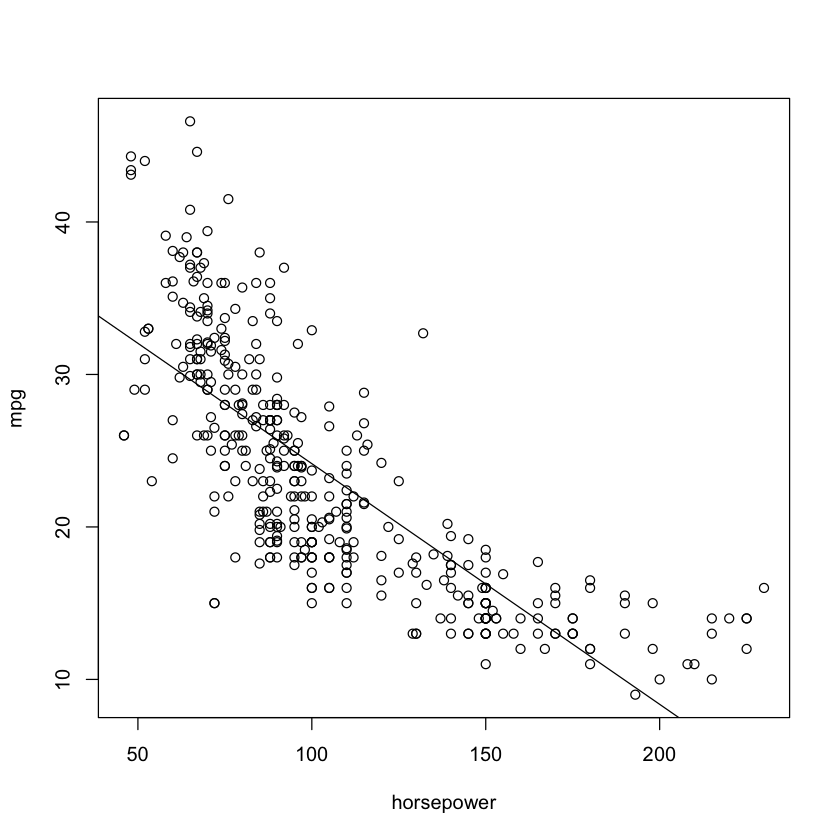

In [30]:
# scatterplot of horsepower vs. mpg
plot(horsepower, mpg)

# overlay regression line on scatterplot
abline(auto.LM)

(c) Use the **plot()** function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

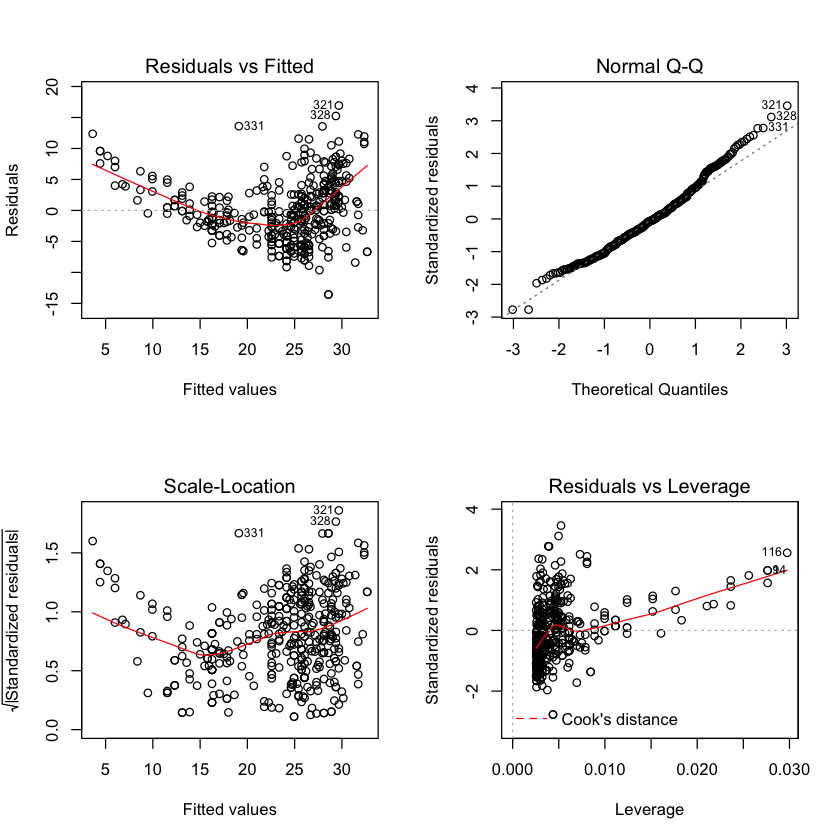

In [32]:
# plot matrix: 2 rows and 2 columns
par(mfrow=c(2,2))

# diagnostic plots of the least squares regression fit
plot(auto.LM)
# linear model seems to be not a good fit

The strong pattern in resduals indicate the non-linearity in the data. 

Simple linear model seems to be not a good fit.

# Multivariate Linear Regression

This example illustrates building a **multivariate linear regression model** in R using the Auto dataset. This problem appears as an exercise problem (page 122, problem 9) in the following textbook:

Gareth James et al. An Introduction to Statistical Learning with Applications in R. New York, NY: Springer, 2013.

There are multiple parts to this problem.

(a) Produce a **scatterplot matrix** which includes all of the variables in the data set

In [33]:
# Auto dataset is included in the ISLR library
# install ISLR, if not installed

# load the library
library(ISLR)

In [34]:
# attach the dataset for simplified syntax for 
# accessing variables in the dataframe

attach(Auto)

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



In [35]:
# first, remove observations with null values
Auto <- na.omit(Auto)

In [36]:
# list variables (both predictor and response/target)
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [37]:
# view the structure of the dataframe including values and types
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [38]:
# list dimensions of the dataset
dim(Auto)

[1] 392   9

In [39]:
# print data types of dataframe variables/columns
# this is functional programming style -- the function
# class is applied to every member of Auto
sapply(Auto, class)

mpg    cylinders displacement   horsepower       weight acceleration 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric" 
        year       origin         name 
   "numeric"    "numeric"     "factor"

Except for the **name** predictor variable, all other predictors are quantitative. However **origin** and **year** also seems to be qualitative rather than quantitative.

Find the **range** of each quantitative predictor? We can answer this using the range() function. Use **sapply()** to select the quantitative predictors


In [40]:
quant.Predictors <- sapply(Auto, is.numeric)
quant.Predictors

mpg    cylinders displacement   horsepower       weight acceleration 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
        year       origin         name 
        TRUE         TRUE        FALSE

In [41]:
# Auto2 is derived from Auto by retaining only quantitative variables
Auto2 <- Auto[ , quant.Predictors]

In [ ]:
# find the range of each quantitative variable
sapply(auto2, range)